[(-0.15707963267948966, 1.9753766811902755), (-0.07853981633974483, 1.993834667466256), (0.0, 2.0), (0.07853981633974483, 1.993834667466256), (0.15707963267948966, 1.9753766811902755)]


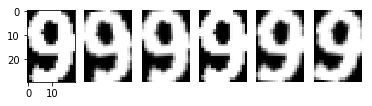

In [87]:
import math
import numpy as np
import matplotlib.pyplot as plt

# from skimage import data
from skimage import transform as tf
from skimage.transform import rotate

RESIZED_IMAGE_WIDTH = 20
RESIZED_IMAGE_HEIGHT = 30

classifications = np.loadtxt("classifications.txt") #, , fmt='%i')
flattened_images = np.loadtxt("flattened_images.txt")#,  fmt='%i')

def center_rotate(image, degrees):
    shift_y, shift_x = np.array(image.shape[:2]) / 2. 
    # I guess the shape[:2] is to cut off a 3rd color dimension
    tf_rotate = tf.SimilarityTransform(rotation=np.deg2rad(degrees))
    tf_shift = tf.SimilarityTransform(translation=[-shift_x, -shift_y])
    tf_shift_inv = tf.SimilarityTransform(translation=[shift_x, shift_y])

    image_rotated = tf.warp(image, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)
    # so it shifts the center of the image to the origin point, then rotates, and then
    # shifts back the center of the image to the center of the "canvas"
    # All the "transforms" are matrices - why exactly this arithmetic works ...
    return image_rotated
    
    

images = [ np.reshape(z, (RESIZED_IMAGE_HEIGHT, -1)) for z in flattened_images ]

step = 0.15707963267948966 # math.pi/20
step = 0.07853981633974483 # pi/40
degrees = [ z*step for z in range(-2,3) ]
print([(z,2*math.cos(z)) for z in degrees ])
transfms2 = [ tf.SimilarityTransform(rotation=z) for z in degrees ]
transfms3 = [ tf.SimilarityTransform(rotation=z, translation=(0, -2*math.cos(z))) for z in degrees ]
transfms4 = [ tf.SimilarityTransform(translation=(z, 0)) for z in range(0,10,2) ]
transfms5 = [ tf.SimilarityTransform(rotation=(math.pi/4)),
           tf.SimilarityTransform(rotation=(math.pi/4), translation=(0,RESIZED_IMAGE_HEIGHT*math.sin(math.pi/4)/2)),
           tf.SimilarityTransform(rotation=(math.pi/4), translation=(0,-RESIZED_IMAGE_HEIGHT*math.sin(math.pi/4)/2))]
tform = tf.SimilarityTransform(scale=1.1, translation=(-5, 0)) # negative values translate to the right?!

# first item in the translation tuple is for the horizontal direction; positive values move it left
# second item in the translation tuple is for the vertical direction; positive values move it up
# positive rotation angle rotates couter-clockwise; rotations are centered at the top left corner
# translation is applied prior to rotation?

# print(classifications[0], tf.warp(images[0], tform))



def transform(image):
    padded = np.lib.pad(image, (2,2), 'constant', constant_values=0)
    translated = tf.warp(padded, tform)
    
    further = [ tf.warp(padded, z) for z in transfms]
    
    return [padded,] + further
#     return further

workimage = images[0]
trans = transform(workimage)
trans = [ center_rotate(workimage, z) for z in range(-10,15,5)]

# print(trans)

fig, ax = plt.subplots(ncols=len(trans)+1, sharex=False, sharey=False)

ax[0].imshow(workimage, cmap=plt.cm.gray)
# ax[0].axis('off')
for i in range(len(trans)):
  ax[i+1].imshow(trans[i], cmap=plt.cm.gray)
  ax[i+1].axis('off')


plt.show()

# shift_y, shift_x = np.array(workimage.shape[:2]) / 2. 
# # I guess the shape[:2] is to cut off a 3rd color dimension
# tf_rotate = tf.SimilarityTransform(rotation=np.deg2rad(30))
# tf_shift = tf.SimilarityTransform(translation=[-shift_x, -shift_y])
# tf_shift_inv = tf.SimilarityTransform(translation=[shift_x, shift_y])

# image_rotated = tf.warp(workimage, (tf_shift + (tf_rotate + tf_shift_inv)).inverse)


# plt.imshow(image_rotated)
# plt.show()

